In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
df = pd.read_csv("C:\\Users\\Retheck\\Downloads\\fare file python\\fare.csv")
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748,2.75,1,75.00,24,6.300,0
1,1187,3.43,1,105.00,24,13.200,0
2,730,3.12,1,71.25,0,26.625,1
3,671,5.63,3,90.00,0,9.750,0
4,329,2.09,1,45.00,12,13.200,0
...,...,...,...,...,...,...,...
209668,1617,8.42,1,150.00,47,5.800,0
209669,438,1.29,1,48.75,12,34.575,1
209670,571,2.82,1,63.75,0,6.000,0
209671,491,2.16,1,56.25,0,13.500,0


In [11]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748,2.75,1,75.00,24,6.300,0
1,1187,3.43,1,105.00,24,13.200,0
2,730,3.12,1,71.25,0,26.625,1
3,671,5.63,3,90.00,0,9.750,0
4,329,2.09,1,45.00,12,13.200,0


In [12]:
df.shape

(209673, 7)

In [13]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'surge_applied'],
      dtype='object')

In [14]:
#NULL VALUES

df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
surge_applied         0
dtype: int64

In [15]:
#DESCRIPTIVE ANALYTICS
#EDA

df.dtypes

trip_duration           int64
distance_traveled     float64
num_of_passengers       int64
fare                  float64
tip                     int64
miscellaneous_fees    float64
surge_applied           int64
dtype: object

In [16]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,1.000000


In [17]:
df['trip_duration']

0          748
1         1187
2          730
3          671
4          329
          ... 
209668    1617
209669     438
209670     571
209671     491
209672    3614
Name: trip_duration, Length: 209673, dtype: int64

<Axes: xlabel='trip_duration', ylabel='Density'>

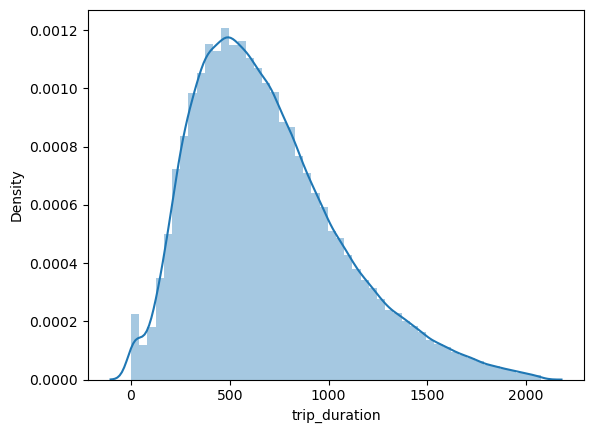

In [55]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['trip_duration'])


In [56]:
#DISTANCE TRAVELLED WITH TRIP_DURATION

dff=df[['trip_duration','distance_traveled']]
dff=dff[dff['trip_duration']==0]
dff

,trip_duration,distance_traveled
3074,0,0.18
4535,0,0.02
15019,0,7.19
46617,0,0.11
51024,0,0.05
75746,0,0.10
80323,0,0.02
82499,0,0.24
98332,0,0.02
130369,0,0.10


In [57]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'surge_applied'],
      dtype='object')

In [58]:
df['num_of_passengers'].unique()

array([1], dtype=int64)

In [59]:
df['num_of_passengers']


0         1
1         1
2         1
4         1
5         1
         ..
209666    1
209667    1
209669    1
209670    1
209671    1
Name: num_of_passengers, Length: 153472, dtype: int64

In [60]:

dff=df[['trip_duration','distance_traveled','num_of_passengers']]
dff=dff[dff['num_of_passengers']==0]
dff

,trip_duration,distance_traveled,num_of_passengers


In [61]:
dff_index=df[df['num_of_passengers']==0].index
dff_index

Index([], dtype='int64')

In [62]:
df=df.drop(dff_index,axis=0)

In [63]:
df.shape

(153472, 7)

In [64]:
##feature engineering

df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748,2.75,1,75.00,24,6.300,0
1,1187,3.43,1,105.00,24,13.200,0
2,730,3.12,1,71.25,0,26.625,1
4,329,2.09,1,45.00,12,13.200,0
5,355,1.74,1,45.00,0,26.625,1


In [65]:
df['Total_fare']=df['fare']+df['miscellaneous_fees']

In [66]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied,Total_fare
0,748,2.75,1,75.00,24,6.300,0,81.300
1,1187,3.43,1,105.00,24,13.200,0,118.200
2,730,3.12,1,71.25,0,26.625,1,97.875
4,329,2.09,1,45.00,12,13.200,0,58.200
5,355,1.74,1,45.00,0,26.625,1,71.625


In [67]:
df=df.drop(['fare','tip','miscellaneous_fees'],axis=1)

In [68]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,surge_applied,Total_fare
0,748,2.75,1,0,81.300
1,1187,3.43,1,0,118.200
2,730,3.12,1,1,97.875
4,329,2.09,1,0,58.200
5,355,1.74,1,1,71.625


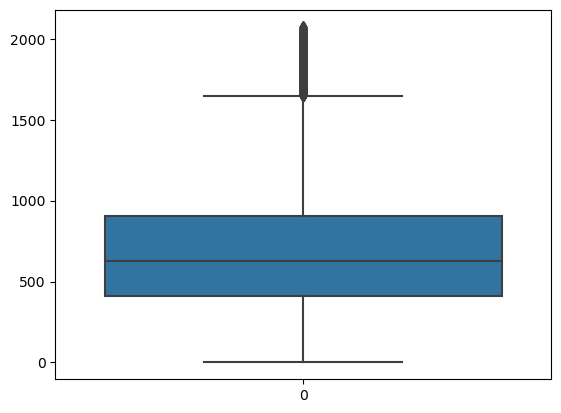

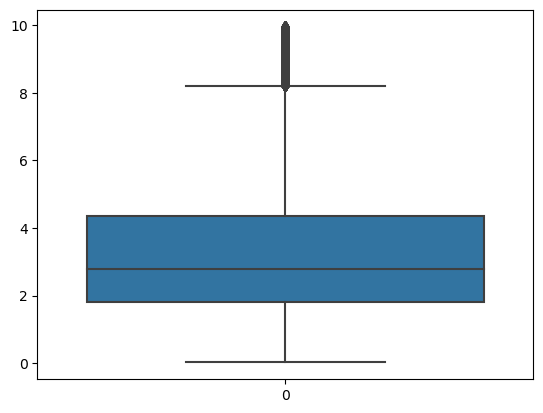

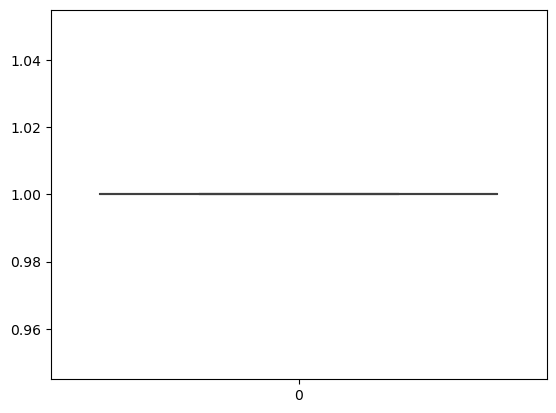

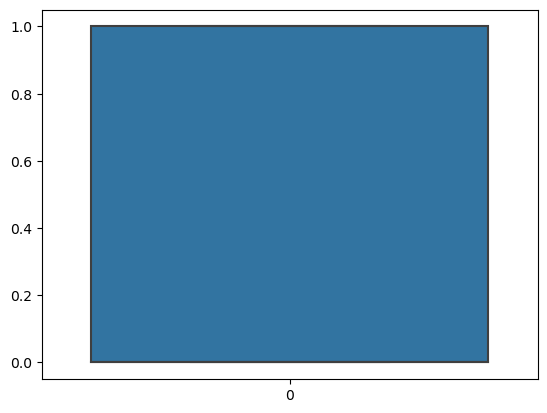

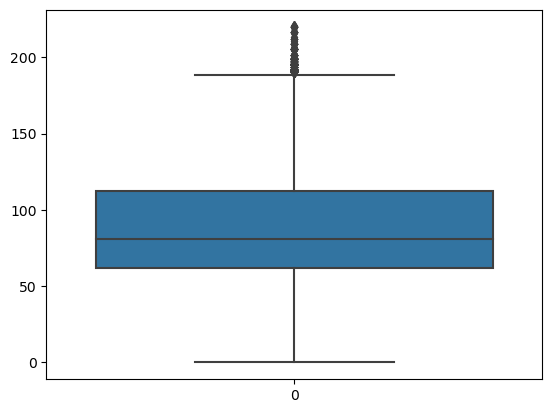

In [69]:
##outliers

for i in df.columns:
    sns.boxplot(df[i])
    plt.show()
    
    

In [70]:
def outlier_detection(data):
    df1=data.columns
    shape=data.shape
    
    for i in df1:
        print(f"Processing columns:{i}")
        print(f"Old Shape:{shape}")
        
        
        data_frame=data[i]
        q1=data_frame.quantile(0.25)
        q3=data_frame.quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        
        outliers=data[(data[i]<lower)|(data[i]>upper)]
        data.drop(index=outliers.index,inplace=True)
        
        print(f"New shape:{data.shape}")
        
    return data
        

In [71]:
fin_df=outlier_detection(df)

Processing columns:trip_duration
Old Shape:(153472, 5)
New shape:(150435, 5)
Processing columns:distance_traveled
Old Shape:(153472, 5)
New shape:(145153, 5)
Processing columns:num_of_passengers
Old Shape:(153472, 5)
New shape:(145153, 5)
Processing columns:surge_applied
Old Shape:(153472, 5)
New shape:(109947, 5)
Processing columns:Total_fare
Old Shape:(153472, 5)
New shape:(108899, 5)


In [72]:
fin_df.shape

(108899, 5)

In [73]:
fin_df.corr()

,trip_duration,distance_traveled,num_of_passengers,surge_applied,Total_fare
trip_duration,1.000000,0.749568,NaN,NaN,0.898080
distance_traveled,0.749568,1.000000,NaN,NaN,0.880649
num_of_passengers,NaN,NaN,NaN,NaN,NaN
surge_applied,NaN,NaN,NaN,NaN,NaN
Total_fare,0.898080,0.880649,NaN,NaN,1.000000


In [74]:
#multiple linear regression

x = fin_df.drop('Total_fare',axis=1)
y= fin_df['Total_fare']

In [75]:
y.head()

0     81.30
1    118.20
4     58.20
6     58.50
8     39.75
Name: Total_fare, dtype: float64

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=10)

In [77]:
xtrain.shape,ytrain.shape

((87119, 4), (87119,))

In [78]:
xtest.shape,ytest.shape

((21780, 4), (21780,))

In [79]:
model = LinearRegression().fit(xtrain,ytrain)

In [80]:
model.coef_

array([0.04484661, 7.78862213, 0.        , 0.        ])

In [81]:
model.intercept_

26.457320040387245

In [82]:
predictions= model.predict(xtest)

In [83]:
pred_table=pd.DataFrame()
pred_table['Prediction']= predictions
pred_table['Actual']=list(ytest)

In [84]:
pred_table

,Prediction,Actual
0,44.466306,39.75
1,123.490277,118.20
2,76.355909,73.50
3,46.642457,62.25
4,84.805922,88.50
...,...,...
21775,81.149533,81.00
21776,95.556602,92.25
21777,103.640399,103.20
21778,124.446544,122.70


In [85]:
ytest.isnull().sum()

0

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(ytest,predictions)

0.89863357805629

In [88]:
model=sm.OLS(y,x).fit()

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Total_fare   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.175e+05
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:58:27   Log-Likelihood:            -3.7976e+05
No. Observations:              108899   AIC:                         7.595e+05
Df Residuals:                  108896   BIC:                         7.596e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
trip_duration         0.0448      0.000    384.499      0.000       0.045       0.045
distance_traveled     7.7839      0.023    335.224      0.000       7.738       7.829
num_of_passengers    26.5058      0.053    502.040      0.000      26.402      26.609
surge_applied              0          0        nan        nan           0           0
==============================================================================
Omnibus:                   101127.225   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13579234.730
Skew:                           4.056   Prob(JB):                         0.00
Kurtosis:                      57.101   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: xlabel='Total_fare', ylabel='Density'>

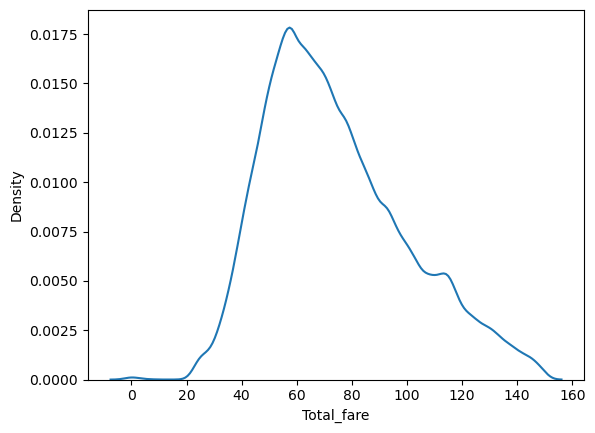

In [90]:
sns.kdeplot(fin_df["Total_fare"])